In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

## This allows the display of more than one variable in a cell
## without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import API key
#from api_keys import geoapify_key

##Website source: https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

from datetime import date
from pprint import pprint

 ## This allows the display of more than one variable in a cell
 ## without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Load the CSV file into a Pandas DataFrame and apply any filters
data_df = pd.read_csv("Resources/DrugODs_Demographic.csv")

##Filter core data to be analyzed (i.e. only opioid deaths, deaths per 100k - age-adjusted)
all_df = data_df[data_df["PANEL"] == "Drug overdose deaths involving any opioid"]
all_df = all_df[all_df["UNIT"] == "Deaths per 100,000 resident population, age-adjusted"]

male_df = all_df[all_df["STUB_LABEL"] == "Male"]
female_df = all_df[all_df["STUB_LABEL"] == "Female"]
all_df = all_df[all_df["STUB_LABEL"] == "All persons"]

# Display sample data
len(all_df)
len(male_df)
len(female_df)

all_df.dtypes
all_df.head()


20

20

20

INDICATOR          object
PANEL              object
PANEL_NUM           int64
UNIT               object
UNIT_NUM            int64
STUB_NAME          object
STUB_NAME_NUM       int64
STUB_LABEL         object
STUB_LABEL_NUM    float64
YEAR                int64
YEAR_NUM            int64
AGE                object
AGE_NUM           float64
ESTIMATE          float64
FLAG               object
dtype: object

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
987,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,2.9,NaN
988,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,3.0,NaN
989,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,3.3,NaN
990,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,4.1,NaN
991,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,4.5,NaN


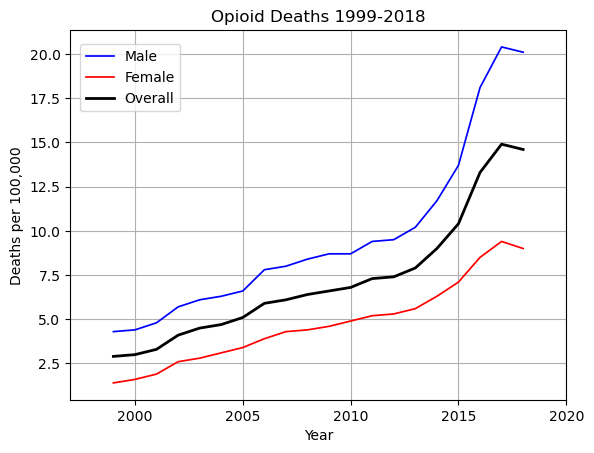

In [4]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

##Define data to be analyzed from DF (One set each for all, male, female)
Year_all = all_df.loc[:,"YEAR"]
Deaths_all = all_df.loc[:,"ESTIMATE"]

Year_male = male_df.loc[:,"YEAR"]
Deaths_male = male_df.loc[:,"ESTIMATE"]

Year_female = female_df.loc[:,"YEAR"]
Deaths_female = female_df.loc[:,"ESTIMATE"]

##Set parameters and variables to be plotted on a line chart with output
fig, ax1 = plt.subplots()
plt.title("Opioid Deaths 1999-2018", fontsize=12)
ax1.set_xlim(min(Year_all)-2, max(Year_all)+2)

ax1.set_ylabel("Deaths per 100,000")
ax1.set_xlabel("Year")
plt.grid(True)

all, = plt.plot(Year_all, Deaths_all, linewidth=2.0, marker="", color="black", label="Overall")
male, = plt.plot(Year_male, Deaths_male, linewidth=1.25, marker="", color="blue", label="Male")
female, = plt.plot(Year_female, Deaths_female, linewidth=1.25, marker="", color="red", label="Female")

plt.legend(handles=[male, female, all], loc=(0.02,.78))

plt.show();